# EDA of a Univariate Time Series

**Approximate Learning time:** Up to 45 minutes

--- 

This notebook is designed as a playground for you to apply what you've learned from Notebook 1.0. Your task is to select a univariate dataset and use the techniques covered in the previous notebook to explore and analyze the data.


---

## Setup

In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import json
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.signal import periodogram

import sys; sys.path.append("../")
import utils_tfb # contains the function to read/preprocess the datasets as provided by the authors

TS_DATA_FOLDER = pathlib.Path("../forecasting").resolve() # Data folder

dataset_name = "m4_monthly_dataset_43531.csv" # FEEL FREE TO CHANGE THIS 
dataset = TS_DATA_FOLDER / dataset_name
data = utils_tfb.read_data(dataset)
data.head()

,channel_1
date,
1998-12-31 12:00:00,4155.7457
1999-01-31 12:00:00,4291.8389
1999-02-28 12:00:00,4168.7291
1999-03-31 12:00:00,4470.3329
1999-04-30 12:00:00,4710.2099


## Raw Time Series

<Axes: xlabel='date'>

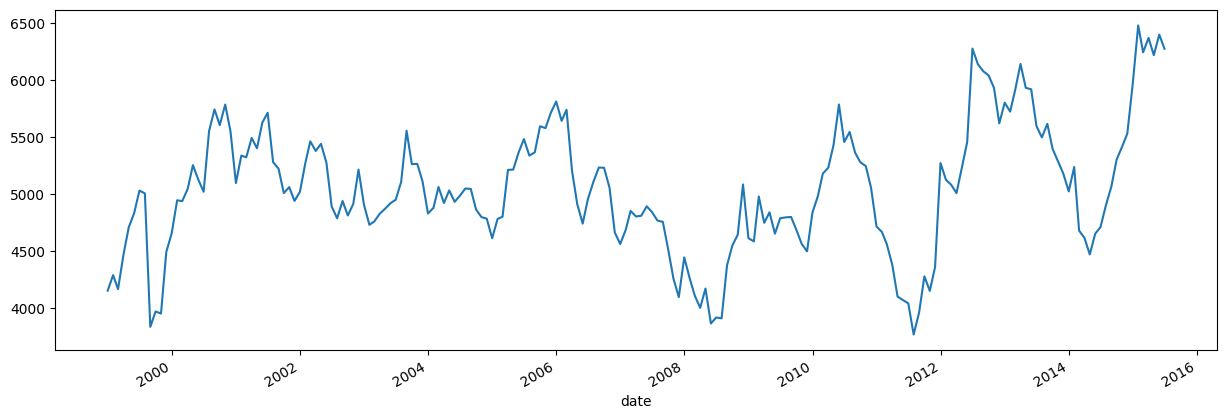

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=100)
data['channel_1'].plot(ax=ax)

**What do you observe?**
- Observation 1:

## Summarization: Descriptive Statistics

In [4]:
data['channel_1'].describe()

count     199.000000
mean     5040.988221
std       558.636601
min      3771.425400
25%      4715.146550
50%      5021.611200
75%      5373.677050
max      6479.082900
Name: channel_1, dtype: float64

## Summarization: Rolling Statistics (Window=7)

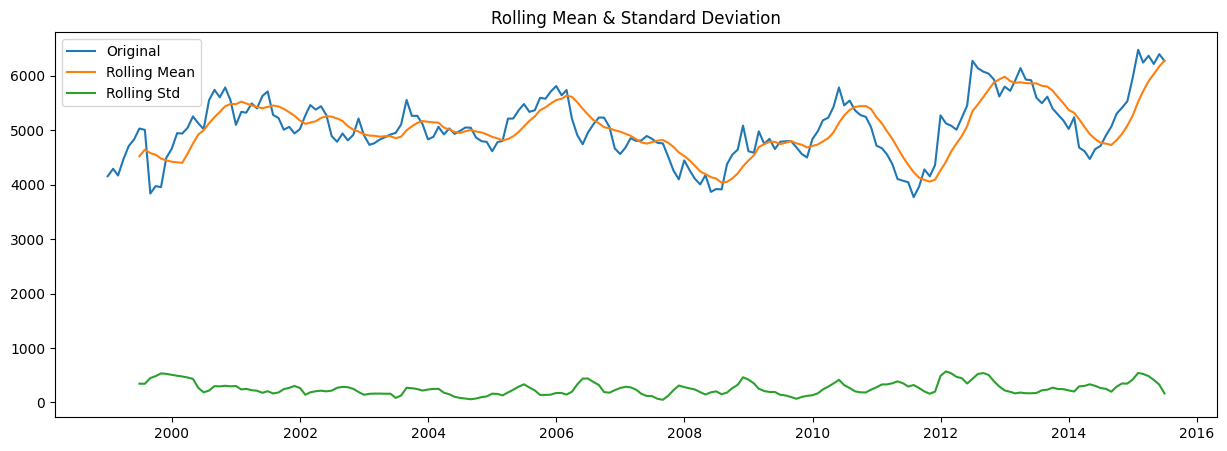

In [5]:
# Rolling statistics
rolling_mean = data['channel_1'].rolling(window=7).mean()
rolling_std = data['channel_1'].rolling(window=7).std()
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['channel_1'], label='Original')
plt.plot(data.index, rolling_mean, label='Rolling Mean')
plt.plot(data.index, rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


**What do you observe?**
- Observation 1:

## Correlation Plots: Autocorrelation Function

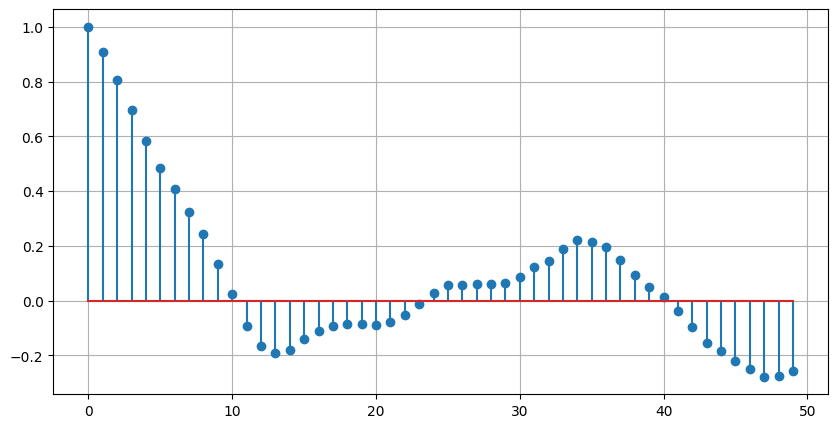

In [6]:
lags = np.arange(50)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=100)
autocorrs = [data['channel_1'].autocorr(lag=lag) for lag in lags]
ax.stem(lags, autocorrs)
ax.grid()

**What do you observe?**
- Observation 1:

## Correlation Plots: Partial Autocorrelation Function (PACF)

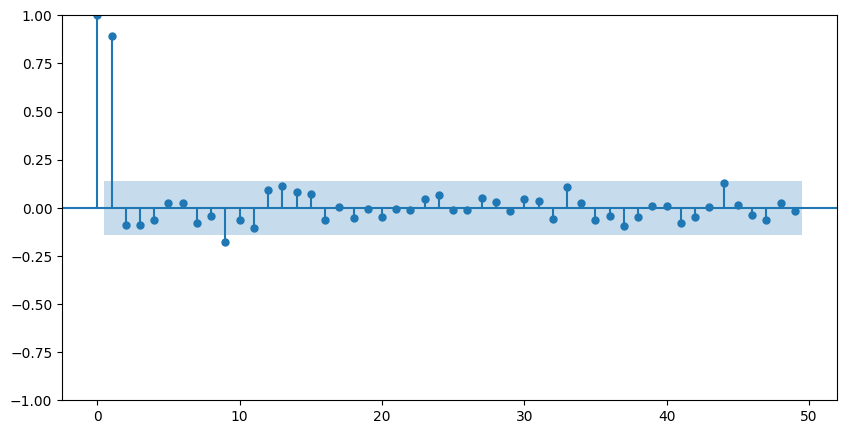

In [7]:
lags = np.arange(50)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=100)
_ = plot_pacf(data['channel_1'], method='ywm', lags=lags, ax=ax, title=None)

**What do you observe?**
- Observation 1:

## Stationarity

In [8]:
# check stationarity 
from statsmodels.tsa.stattools import adfuller


alpha = 0.05
results = adfuller(data['channel_1'].values)
pvalue = results[1]

if pvalue < alpha:
    print(f"p-value: {pvalue: 0.5f}. Reject the null. The time series is stationary")
else:
    print(f"p-value: {pvalue: 0.5f}. Accept the null. The time series is non-stationary")



p-value:  0.10914. Accept the null. The time series is non-stationary


**What do you observe?**
- Observation 1:

## Time Series Decomposition

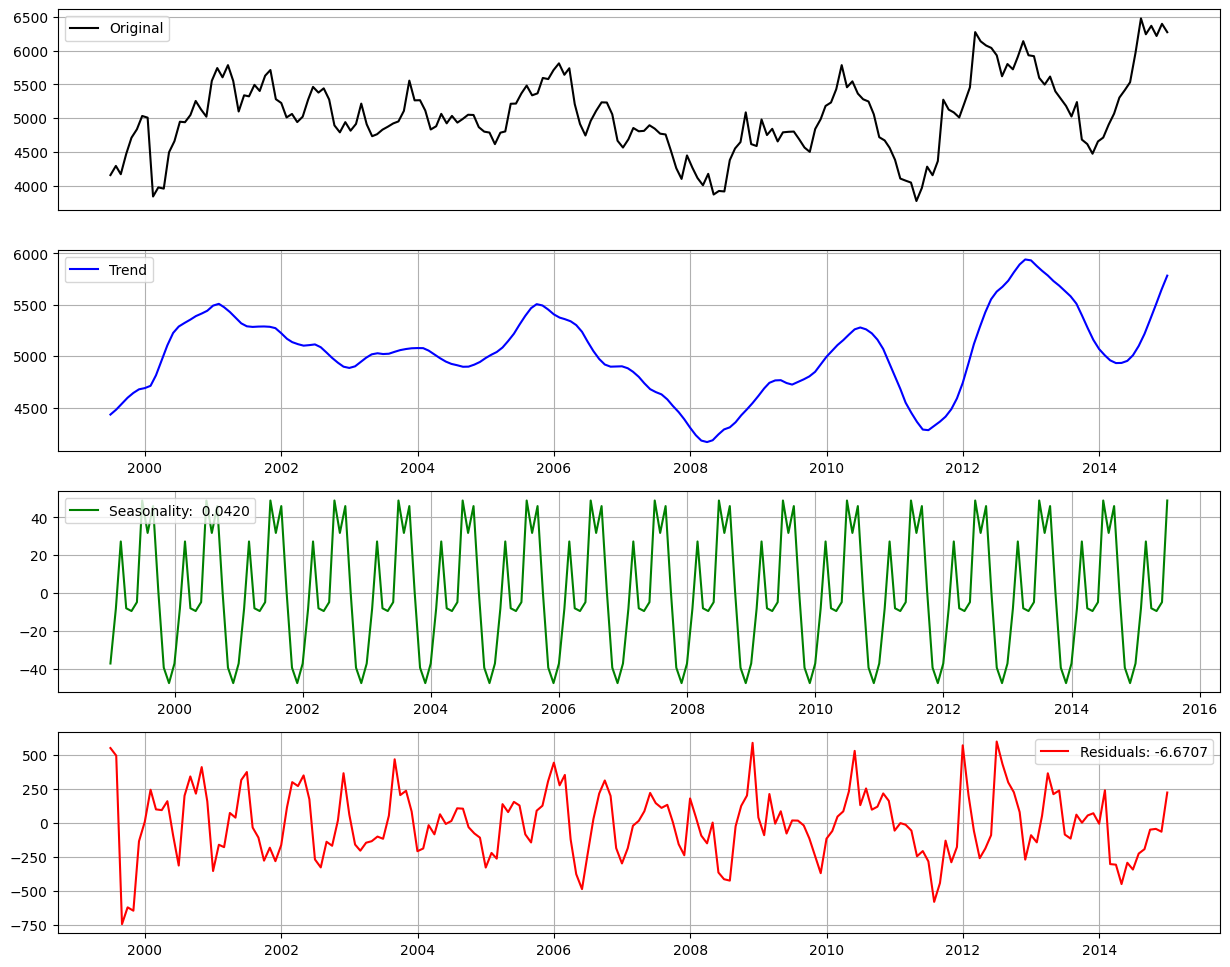

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), dpi=100)

# original series
ax = axs[0]
ax.plot(data.channel_1, color='black', label='Original')
ax.legend()
ax.grid()
ax.set_xticks([])

result = seasonal_decompose(data.channel_1, model="additive")

# trend
ax = axs[1]
ax.plot(result.trend, color='blue', label='Trend')
ax.legend()
ax.grid()

# seasonality
ax = axs[2]
ax.plot(result.seasonal, color="green", label=f'Seasonality: {result.seasonal.mean(): 0.4f}')
ax.legend()
ax.grid()

# residual
ax = axs[3]
ax.plot(result.resid, color="red", label=f'Residuals: {result.resid.mean(): 0.4f}')
ax.legend()
ax.grid()


**What do you observe?**
- Observation 1:

## Frequency Analysis

<StemContainer object of 3 artists>

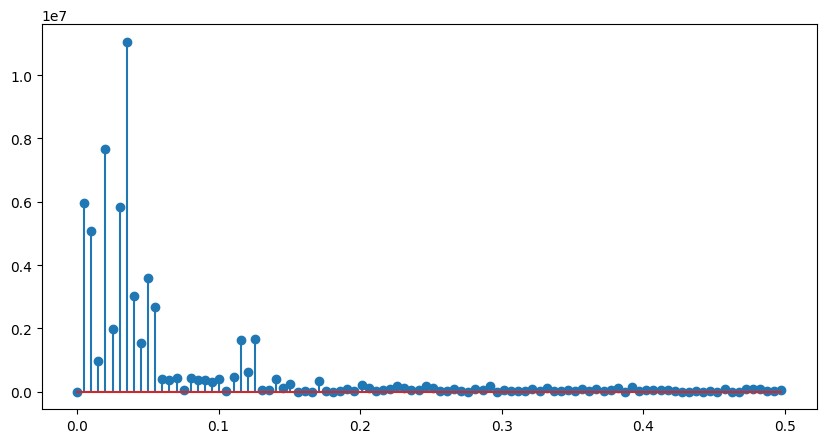

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=100)
freqs, power = periodogram(data.channel_1.values)
ax.stem(freqs, power)

**What do you observe?**
- Observation 1:

--- 

## Next Steps

1. **EDA for Multi-variate time series:** Proceed to `1.2_gluonts_datasets.ipynb` to do EDA on multi-variate time series.
2. **Using GluonTS to access datasets:** Proceed to `1.3_gluonts_datasets.ipynb` to explore the GluonTS library, a powerful tool for modeling time series.

---